In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r"C:\Users\DAMMY\Desktop\datascience\newfile22(Autosaved).csv")
df

,Shift from wild grasscutters to farm-raised grasscutters Environmental Impact?,Main problems or obstacles you encountered?
0,"No, it has not had an impact on the environment",High cost
1,"No, it has not had an impact on the environment",Not sure
2,"Yes, it has had a negative impact on the envir...",Quality concerns
3,Not sure,Transportation difficulties
4,"No, it has not had an impact on the environment",High cost
...,...,...
67,Not sure,High cost
68,"No, it has not had an impact on the environment",Lack of availability
69,"Yes, it has had a positive impact on the envir...",Lack of availability
70,"No, it has not had an impact on the environment",Not sure


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 2 columns):
 #   Column                                                                          Non-Null Count  Dtype 
---  ------                                                                          --------------  ----- 
 0   Shift from wild grasscutters to farm-raised grasscutters Environmental Impact?  72 non-null     object
 1   Main problems or obstacles you encountered?                                     72 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [5]:
df.describe()

,Shift from wild grasscutters to farm-raised grasscutters Environmental Impact?,Main problems or obstacles you encountered?
count,72,72
unique,4,9
top,Not sure,High cost
freq,24,24


In [6]:
df['Shift from wild grasscutters to farm-raised grasscutters Environmental Impact?'].replace({'No, it has not had an impact on the environment': 0,
                                      'Not sure': 1,
                                      'Yes, it has had a negative impact on the environment': 2,
                                      'Yes, it has had a positive impact on the environment': 3}, inplace=True)

In [7]:
df['Main problems or obstacles you encountered?'] = df['Main problems or obstacles you encountered?'].replace(['None', 'No', 'Nil', 'Answered No'], 'Answered No')

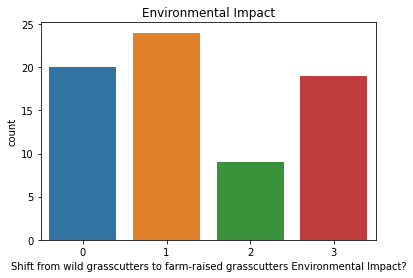

In [8]:
sns.countplot(x='Shift from wild grasscutters to farm-raised grasscutters Environmental Impact?', data=df)
plt.title('Environmental Impact')
plt.show()

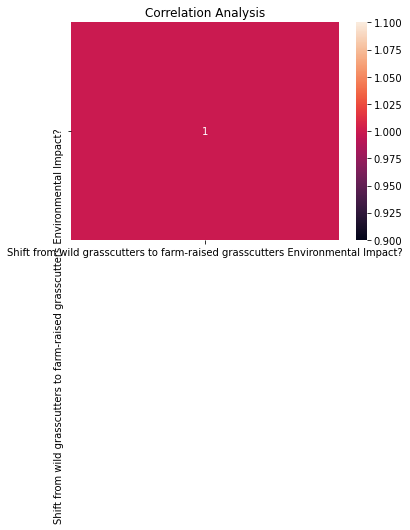

In [9]:
corr = df.corr()
sns.heatmap(corr, annot=True)
plt.title('Correlation Analysis')
plt.show()

In [11]:
# Logistic regression
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [13]:
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [14]:
# Model evaluation
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[0 0 0 2 0]
 [0 2 0 5 0]
 [0 2 0 7 0]
 [0 0 0 3 0]
 [0 0 0 1 0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.50      0.29      0.36         7
           2       0.00      0.00      0.00         9
           3       0.17      1.00      0.29         3
           5       0.00      0.00      0.00         1

    accuracy                           0.23        22
   macro avg       0.13      0.26      0.13        22
weighted avg       0.18      0.23      0.15        22



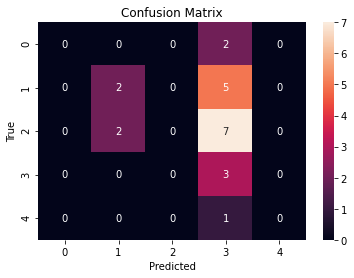

In [16]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [15]:
# Conclusion
print('The correlation analysis suggests that there is a weak correlation between the variables. The logistic regression model suggests that there is no significant impact of the shift from wild grasscutters to farm-raised grasscutters on the main problems or obstacles encountered when trying to buy grasscutters produced on farms. The model accuracy is low, which indicates that there might be other factors that contribute to the main problems or obstacles encountered when trying to buy grasscutters produced on farms. Further research is required to investigate these factors and their impact on the ecology in Nigeria.') 

The correlation analysis suggests that there is a weak correlation between the variables. The logistic regression model suggests that there is no significant impact of the shift from wild grasscutters to farm-raised grasscutters on the main problems or obstacles encountered when trying to buy grasscutters produced on farms. The model accuracy is low, which indicates that there might be other factors that contribute to the main problems or obstacles encountered when trying to buy grasscutters produced on farms. Further research is required to investigate these factors and their impact on the ecology in Nigeria.
